In [48]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import os
import cv2

In [127]:
datapath = 'dataset'
categories = os.listdir(datapath)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))

In [128]:
img_size=100
data=[]
target=[]
for category in categories:
    folder_path = os.path.join(datapath,category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img,(img_size,img_size))
            data.append(resized_img)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [129]:
data = np.array(data)/255.0
data = np.reshape(data, (len(data), 100, 100, 1))
target = np.array(target)

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2,random_state=42,shuffle=True)

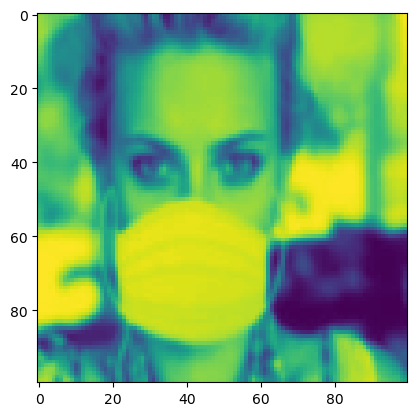

In [131]:
n=random.randint(0,len(X_train))
plt.imshow(X_train[n,:])
plt.show()

In [154]:
model=Sequential()
model.add(Conv2D(50,(3,3),activation="tanh",input_shape=(100,100,1)))
model.add(AveragePooling2D((2,2)))

model.add(Conv2D(20,(3,3),activation="tanh"))
model.add(AveragePooling2D((2,2)))

model.add(Flatten())

model.add(Dense(120,activation="tanh"))
model.add(Dense(84,activation="tanh"))
model.add(Dense(2,activation="softmax"))

In [155]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [156]:
model.fit(X_train, Y_train, epochs=20, validation_data=(X_test,Y_test))

Train on 1100 samples, validate on 276 samples
Epoch 1/20
1100/1100 [==============================] - 4s 3ms/sample - loss: 0.6668 - acc: 0.6409 - val_loss: 0.4420 - val_acc: 0.8007
Epoch 2/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.4700 - acc: 0.7991 - val_loss: 0.3944 - val_acc: 0.8188
Epoch 3/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.3623 - acc: 0.8355 - val_loss: 0.3547 - val_acc: 0.8551
Epoch 4/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.2783 - acc: 0.8982 - val_loss: 0.3132 - val_acc: 0.8659
Epoch 5/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.2068 - acc: 0.9318 - val_loss: 0.7892 - val_acc: 0.6739
Epoch 6/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.2017 - acc: 0.9245 - val_loss: 0.2420 - val_acc: 0.9022
Epoch 7/20
1100/1100 [==============================] - 3s 3ms/sample - loss: 0.1309 - acc: 0.9564 - val_loss: 0.2645 - val_acc: 0.8913
E

In [158]:
model.evaluate(X_test, Y_test)

[0.3747176415678384, 0.89492756]

[[2.3913382e-05 9.9997604e-01]]
1
Face has no mask


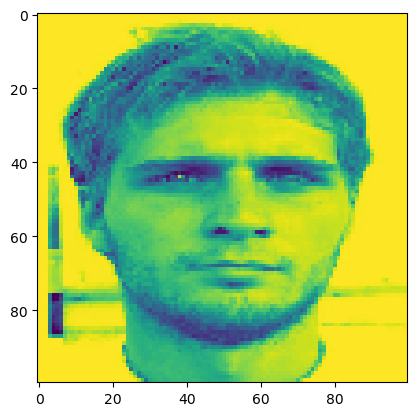

In [168]:
n = random.randint(0,len(X_test))
plt.imshow(X_test[n,:])
y_pred=model.predict(X_test[n,:].reshape(1,100,100,1))
print(y_pred)
print(Y_test[n])
if(y_pred[0][1]<0.5):
    print('Face has mask')
else:
    print("Face has no mask")